Tamaño de los datos: (200, 4)
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Valores nulos por columna:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Estadísticas descriptivas del dataset:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


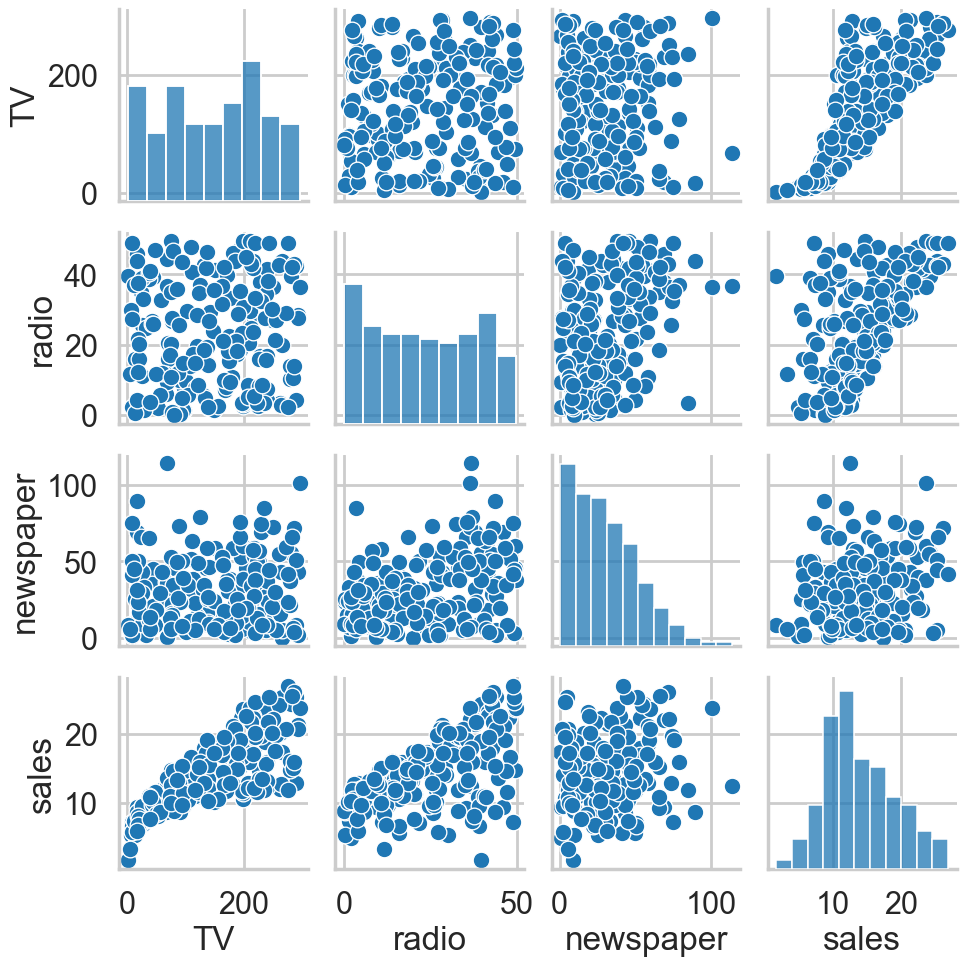

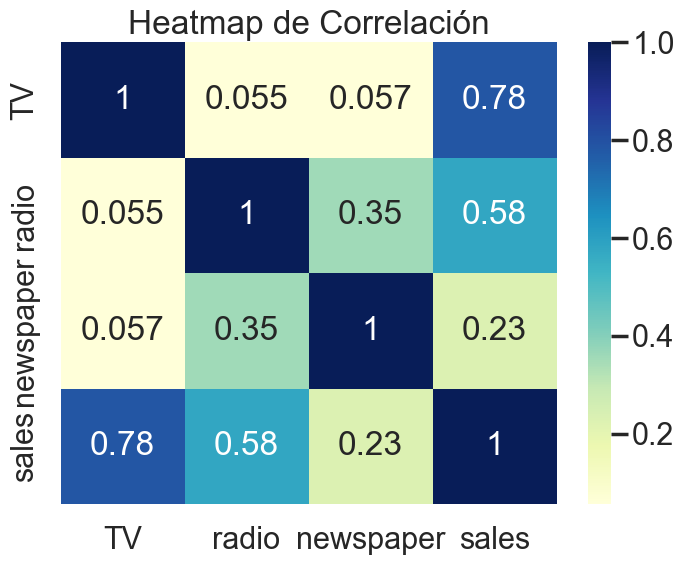

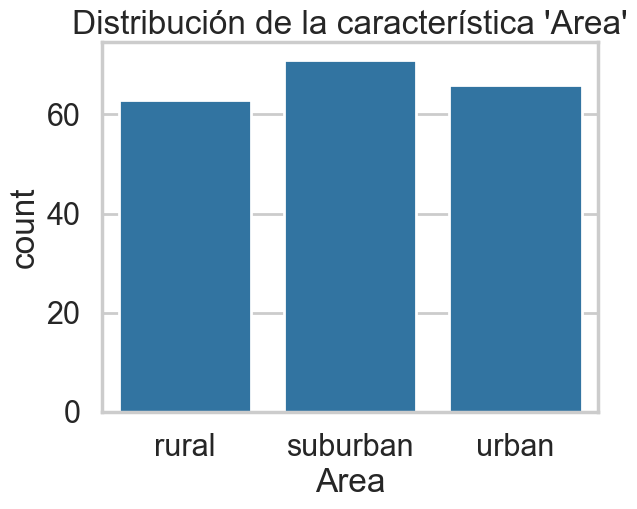


Columnas después de crear variables dummy para 'Area':
Index(['TV', 'radio', 'newspaper', 'sales', 'Area_suburban', 'Area_urban'], dtype='object')

Evaluación del modelo:
Error cuadrático medio (MSE): 11.503708554433796
Coeficiente de determinación (R²): 0.6498054061919163
Error absoluto medio (MAE): 2.5377885964960543

Validación cruzada MSE promedio: 10.823517366086984

Relación entre ventas y gastos en publicidad (coeficientes):
               Coeficiente
TV                0.046996
Area_suburban     0.030101
Area_urban        0.551288

El canal con más relación con las ventas es: Area_urban

Mejor canal para incrementar ventas: Area_urban
Peor canal para incrementar ventas: Area_suburban


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Estilo para las gráficas
sns.set_style("whitegrid")
sns.set_context("poster")

# Cargar y limpiar los datos
df = pd.read_csv("Advertising.csv", index_col=0)
print("Tamaño de los datos:", df.shape)
print(df.head())

# Limpieza de datos - Comprobar valores nulos y reemplazar con la media
print("\nValores nulos por columna:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

# Análisis Exploratorio de Datos (EDA)
# Visualización de distribuciones y relaciones
sns.pairplot(df)
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap de Correlación")
plt.show()

# Crear una característica 'Area' con distribución normal
np.random.seed(0)
area_distribution = np.random.normal(0, 1, len(df))
df['Area'] = pd.cut(area_distribution, bins=[-np.inf, -0.5, 0.5, np.inf], labels=['rural', 'suburban', 'urban'])

# Visualizar la distribución de la nueva característica
sns.countplot(data=df, x='Area')
plt.title("Distribución de la característica 'Area'")
plt.show()

# Convertir "Area" en variables dummy
df = pd.get_dummies(df, columns=['Area'], drop_first=True)

# Inspeccionar las columnas del DataFrame después de crear las variables dummy
print("\nColumnas después de crear variables dummy para 'Area':")
print(df.columns)

# División de datos en conjunto de entrenamiento y prueba
# Seleccionar columnas de características y la variable de salida
features = [col for col in ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban'] if col in df.columns]
X = df[features]
y = df['sales']

# Dividir datos (90% entrenamiento y 10% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo con MSE, R² y MAE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f"Error absoluto medio (MAE): {mae}")

# Validación cruzada con MSE
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nValidación cruzada MSE promedio: {-cv_scores.mean()}")

# Preguntas
# Coeficientes del modelo para cada canal publicitario
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nRelación entre ventas y gastos en publicidad (coeficientes):")
print(coef_df)

# Determinar el canal con más relación con las ventas
max_coef = coef_df['Coeficiente'].abs().idxmax()
print(f"\nEl canal con más relación con las ventas es: {max_coef}")

# Determinar el mejor y peor canal para incrementar ventas
sorted_coef = coef_df.sort_values(by='Coeficiente', ascending=False)
best_channel = sorted_coef.index[0]
worst_channel = sorted_coef.index[-1]

print(f"\nMejor canal para incrementar ventas: {best_channel}")
print(f"Peor canal para incrementar ventas: {worst_channel}")

